In [1]:
import tensorflow as tf
# tf.enable_eager_execution()
import os
import itertools
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
# from hilbert import hilbertCurve
import imgaug.augmenters as iaa
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras import models,layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Activation,BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.transform import rotate,rescale
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage
import numpy as np
import sklearn
import seaborn as sns
import nbformat
import plotly.express as px
import typing
import tensorflow_addons as tfa
from tensorflow.keras import layers
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow_addons as tfa
import tensorflow as tf
import numpy as np


In [2]:
label = ['05' ,  '06' , '07' , '08' , '09' , '10' , '11' ,'16' , '17' , '18' , '19']

dirname1 = []
filename1 = []
fullpath = []
for dirname, _, filenames in os.walk("C:/Users/avina/Downloads/77"):
    for filename in filenames:
        dirname1.append((dirname))
        filename1.append(filename)
        fullpath.append((os.path.join(dirname, filename)))


df = pd.DataFrame(columns=['path' , 'label' ])
label1 = []
path = []
def create_dataframe(fullpath,label):
            
    for i in range(len(fullpath)):
        for j in range(len(label)):
            if (fullpath[i].split('/')[4][29:31]== label[j]):
                path.append(fullpath[i])
                label1.append(label[j])
    
           
    return path,label1  

path,label2=create_dataframe(fullpath,label)
df['path'] = path
df['label'] = label2
final = pd.DataFrame(df)
final.iloc[638]

path     C:/Users/avina/Downloads/77\activity_spectogra...
label                                                   19
Name: 638, dtype: object

In [3]:
labelname = []
classvalue = []

for i in range(len(df)):
    for j in range(len(label)):
        if (df['label'][i] ==  label[j]):
            if (label[j] == '05'):
                labelname.append('Walkingtowards')
                classvalue.append('00')
            elif (label[j] =='06'):
                labelname.append('walkingaway')
                classvalue.append('01')
            elif (label[j] =='07'):
                labelname.append('pickingobject')
                classvalue.append('02')
            elif (label[j] =='08'):
                labelname.append('bending')
                classvalue.append('03')
            elif (label[j] =='09'):
                labelname.append('sitting')
                classvalue.append('04')
            elif (label[j] =='10'):
                labelname.append('kneeling')
                classvalue.append('05')
            elif (label[j] =='11'):
                labelname.append('crawling')
                classvalue.append('06')
            elif (label[j] =='16'):
                labelname.append('walkingontoes')
                classvalue.append('07')
            elif (label[j] =='17'):
                labelname.append('limping')
                classvalue.append('08')
            elif (label[j] =='18'):
                labelname.append('shortsteps')
                classvalue.append('09')
            else :
                labelname.append('scissorsgait')
                classvalue.append('10')

df['labelname'] = labelname
df['classvalue'] = classvalue



for i in range(len(df)-1):
    path = df['path'].iloc[i]
    if(path == 'C:/Users/avina/Downloads/77\\activity_spectogram_77GHz\\08_bending\\activity_spectogram_77GHz - Shortcut.lnk'):
        df.drop(index = i,axis =0,inplace = True)
        print('del')


del


In [4]:
y_train = df['classvalue']
y_train
y_train = y_train.to_numpy()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(df,y_train, test_size = 0.20 , shuffle = True,random_state = 42,stratify=y_train)

In [5]:
fig = px.histogram(x_test, x=y_test)
fig.show()

In [6]:
def create_data(x_train,y_train):
    listimage = []
    
    for i in range(len(x_train)):
        path = x_train['path'].iloc[i]

        image = cv2.imread(path)
        image = cv2.resize(image,(128,128),interpolation=cv2.INTER_AREA)
        #image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
     
        listimage.append(image)
       
            
    
    return  listimage

x_train_resize = create_data(x_train,y_train)

x_train_resize_1 = np.array(x_train_resize)


len(x_train_resize_1)

x_test_resize = create_data(x_test,y_test)

x_test_resize_1 = np.array(x_test_resize)

In [7]:
aug1 = iaa.GaussianBlur(sigma = (0,1))
aug10 = iaa.AdditiveGaussianNoise(loc = 0 , scale = (0,1) , per_channel= True )
aug2 = iaa.Emboss(alpha = (1), strength = 1.5)
aug3 = iaa.Sharpen(alpha = (1.0) , lightness = (1.5))
aug4 = iaa.Crop(px=(0, 16))
#aug5 = iaa.ShearX((-20, 20))
aug6 = iaa.ImpulseNoise(0.1)
#aug7 = iaa.ScaleX((0.5, 1.5))
aug8 = iaa.LinearContrast((0.4, 1.6))
#aug9 = iaa.Solarize(0.5, threshold=(32, 128))

In [8]:
def augment(data,data1):
    aug_X_train = []
    aug_y_train = []
    for i  in range(len(data)):
        aug_X_train.append(data[i])
        
        aug_X_train.append(aug1.augment_image(data[i]))
        aug_X_train.append(aug10.augment_image(data[i]))
        aug_X_train.append(aug3.augment_image(data[i]))
       
        aug_X_train.append(aug6.augment_image(data[i]))
        
        
        for j in range(5):
            aug_y_train.append(data1[i])


    return   aug_X_train,aug_y_train


x_train_aug,aug_y_train = augment(x_train_resize_1,y_train)
len(x_train_aug),len(aug_y_train),type(x_train_aug), type(aug_y_train)
x_train_aug_2 = np.array(x_train_aug,dtype = 'float32')

aug_y_train_1 = np.array(aug_y_train ,dtype ='float32')
y_test = np.array(y_test ,dtype ='float32')

In [9]:
def normalization(train,test):
    mean = np.mean(train)
    std = np.mean(test)
    train = (train - mean)/std
    test = (test -mean)/std
    return train,test

In [10]:
x_train,x_test = normalization(x_train_aug_2,x_test_resize_1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

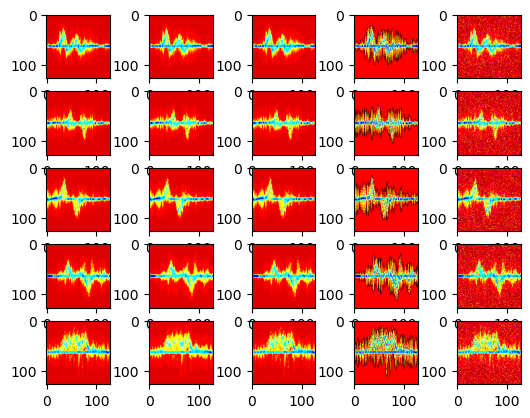

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

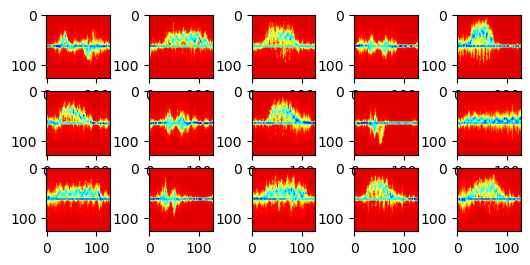

In [11]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow((x_train[i]))

plt.show()


for i in range(15):
  plt.subplot(5,5,i+1)
  plt.imshow(x_test[i])

plt.show()

In [12]:
x_train.shape , np.mean(x_train), np.mean(x_test) , np.var(x_train) , np.var(x_test)

((2590, 128, 128, 3), -5.2238636e-07, -0.0532937, 1.6958814, 1.5075747)

In [13]:
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: avinashdixit94 (warlord). Use `wandb login --relogin` to force relogin


True

In [14]:
wandb.init(
        project="keras-intro",
        # (optional) set entity to specify your username or team name
        # entity="my_team",
        config={
            
            "activation_1": "relu",
            
            "layer_2": 11,
            "activation_2": "softmax",
            "optimizer": "ADAM",
            "loss": "sparse_categorical_crossentropy",
            "metric": "accuracy",
            "epoch": 5,
            "batch_size": 128,
        },
    )
config = wandb.config

In [15]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 128
num_epochs = 10

def activation_block(x):
    return layers.BatchNormalization()(layers.Activation(config.activation_2)(x))


def conv_stem(x, filters:int, patch_size:int):
    x = layers.Conv2D(filters,kernel_size = patch_size, strides = patch_size)(x)
    return activation_block(x)


def conv_mixer_block(x,filters:int,kernel_size:int):
    x0=x
    x = layers.DepthwiseConv2D(kernel_size = kernel_size , padding ='same')(x)
    #x = layers.Dropout(0.5)(x)
    x = layers.Add()([activation_block(x),x0])
    
    x = layers.Conv2D(filters, kernel_size =1)(x)
    x=activation_block(x)
    return x


def get_conv_mixer_256_8(image_size =72,filters =128 , depth=2,kernel_size =5,patch_size=2,num_classes=11):
    inputs = keras.Input((128,128,3))
    x = conv_stem(inputs,filters,patch_size)
    for _ in range(depth):
        x = conv_mixer_block(x,filters,kernel_size)
    x = layers.GlobalAvgPool2D()(x)
    #x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(config.layer_2, activation=config.activation_2)(x)
    return keras.Model(inputs, outputs)


conv_mixer_model = get_conv_mixer_256_8()
conv_mixer_model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 128)  1664        ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 64, 64, 128)  0           ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 128)  512        ['activation[0][0]']         

In [16]:
conv_mixer_model.compile(
        optimizer = keras.optimizers.Adam(lr=1e-03, decay=1e-6),
        loss=config.loss, metrics=[config.metric],
    )

c:\Users\avina\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [17]:
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint
wandb_callbacks = [
        WandbMetricsLogger(),
        WandbModelCheckpoint(filepath="C:\\Users\\avina\\HAR_END_TO_END\\my_model_{epoch:02d}"),
    ]

In [18]:
conv_mixer_model.fit(
    x_train,
    aug_y_train_1,
    epochs=config.epoch,
    
    verbose=1, # Suppress chatty output
    callbacks=wandb_callbacks,
    validation_data=(x_test,y_test),
)

    # Mark the run as finished
wandb.finish()

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: cannot import name 'soft_unicode' from 'markupsafe' (C:\Users\avina\AppData\Roaming\Python\Python39\site-packages\markupsafe\__init__.py)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: cannot import name 'soft_unicode' from 'markupsafe' (C:\Users\avina\AppData\Roaming\Python\Python39\site-packages\markupsafe\__init__.py)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
81/81 [==============================] - ETA: 0s - loss: 2.3078 - accuracy: 0.1548

INFO:tensorflow:Assets written to: C:\Users\avina\HAR_END_TO_END\my_model_01\assets


INFO:tensorflow:Assets written to: C:\Users\avina\HAR_END_TO_END\my_model_01\assets
wandb: Adding directory to artifact (C:\Users\avina\HAR_END_TO_END\my_model_01)... Done. 0.0s


81/81 [==============================] - 16s 159ms/step - loss: 2.3078 - accuracy: 0.1548 - val_loss: 2.4010 - val_accuracy: 0.0923
Epoch 2/5
81/81 [==============================] - ETA: 0s - loss: 2.0567 - accuracy: 0.2629

INFO:tensorflow:Assets written to: C:\Users\avina\HAR_END_TO_END\my_model_02\assets


INFO:tensorflow:Assets written to: C:\Users\avina\HAR_END_TO_END\my_model_02\assets
wandb: Adding directory to artifact (C:\Users\avina\HAR_END_TO_END\my_model_02)... Done. 0.0s


81/81 [==============================] - 13s 164ms/step - loss: 2.0567 - accuracy: 0.2629 - val_loss: 2.4342 - val_accuracy: 0.0923
Epoch 3/5
81/81 [==============================] - ETA: 0s - loss: 1.8696 - accuracy: 0.3270

INFO:tensorflow:Assets written to: C:\Users\avina\HAR_END_TO_END\my_model_03\assets


INFO:tensorflow:Assets written to: C:\Users\avina\HAR_END_TO_END\my_model_03\assets
wandb: Adding directory to artifact (C:\Users\avina\HAR_END_TO_END\my_model_03)... Done. 0.0s


81/81 [==============================] - 13s 164ms/step - loss: 1.8696 - accuracy: 0.3270 - val_loss: 2.5335 - val_accuracy: 0.0846
Epoch 4/5
81/81 [==============================] - ETA: 0s - loss: 1.6979 - accuracy: 0.4077

INFO:tensorflow:Assets written to: C:\Users\avina\HAR_END_TO_END\my_model_04\assets


INFO:tensorflow:Assets written to: C:\Users\avina\HAR_END_TO_END\my_model_04\assets
wandb: Adding directory to artifact (C:\Users\avina\HAR_END_TO_END\my_model_04)... Done. 0.0s


81/81 [==============================] - 14s 170ms/step - loss: 1.6979 - accuracy: 0.4077 - val_loss: 2.6585 - val_accuracy: 0.0846
Epoch 5/5
81/81 [==============================] - ETA: 0s - loss: 1.5346 - accuracy: 0.4819

INFO:tensorflow:Assets written to: C:\Users\avina\HAR_END_TO_END\my_model_05\assets


INFO:tensorflow:Assets written to: C:\Users\avina\HAR_END_TO_END\my_model_05\assets
wandb: Adding directory to artifact (C:\Users\avina\HAR_END_TO_END\my_model_05)... Done. 0.0s


81/81 [==============================] - 13s 164ms/step - loss: 1.5346 - accuracy: 0.4819 - val_loss: 2.9524 - val_accuracy: 0.0846


epoch/accuracy,▁▃▅▆█
epoch/epoch,▁▃▅▆█
epoch/learning_rate,▁▁▁▁▁
epoch/loss,█▆▄▂▁
epoch/val_accuracy,██▁▁▁
epoch/val_loss,▁▁▃▄█
epoch/accuracy,0.48185
epoch/epoch,4
epoch/learning_rate,0.001
epoch/loss,1.53461
epoch/val_accuracy,0.08462


In [25]:
tf.__version__

'2.10.0'